1. Подберите скорость обучения (eta) и количество итераций

In [2]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [19]:
n = X.shape[1]
eta = 0.01
n_iter = 501
W = np.array([1, 0.5])
errors = []
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [18.77319138  8.6270072 ], MSE = 398.58
Iteration #20: W_new = [27.15289315  7.06014716], MSE = 207.1
Iteration #30: W_new = [32.4241672   6.10426679], MSE = 124.63
Iteration #40: W_new = [35.85213314  5.48265802], MSE = 86.53
Iteration #50: W_new = [38.15155609  5.06569312], MSE = 67.79
Iteration #60: W_new = [39.73790007  4.7780341 ], MSE = 58.04
Iteration #70: W_new = [40.86051023  4.57446606], MSE = 52.69
Iteration #80: W_new = [41.67349173  4.4270444 ], MSE = 49.62
Iteration #90: W_new = [42.2746909  4.3180262], MSE = 47.78
Iteration #100: W_new = [42.727794    4.23586294], MSE = 46.63
Iteration #110: W_new = [43.07521157  4.17286412], MSE = 45.89
Iteration #120: W_new = [43.34578807  4.12379924], MSE = 45.4
Iteration #130: W_new = [43.55952748  4.08504089], MSE = 45.06
Iteration #140: W_new = [43.73055537  4.05402762], 

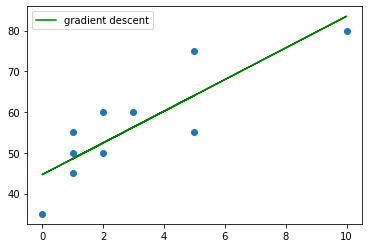

In [20]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

Text(0, 0.5, 'MSE')

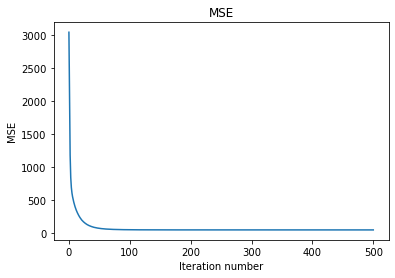

In [10]:
# Визуализируем изменение функционала ошибки
import matplotlib.pyplot as plt
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [26]:
n = X.shape[1]

eta = 1e-2 
n_iter = 500

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
#     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
#     if i % 10 == 0:
#         print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [19.96966932  8.87179137], MSE = 379.6
Iteration #20: W_new = [29.27719328  6.70531799], MSE = 172.93
Iteration #30: W_new = [35.16120834  5.60976141], MSE = 94.66
Iteration #40: W_new = [38.85365942  4.93848587], MSE = 63.9
Iteration #50: W_new = [41.16920131  4.51849616], MSE = 51.81
Iteration #60: W_new = [42.62118483  4.25519525], MSE = 47.05
Iteration #70: W_new = [43.53165976  4.0900943 ], MSE = 45.18
Iteration #80: W_new = [44.10257814  3.98656703], MSE = 44.45
Iteration #90: W_new = [44.46057568  3.9216497 ], MSE = 44.16
Iteration #100: W_new = [44.68506002  3.88094292], MSE = 44.04
Iteration #110: W_new = [44.82582417  3.85541751], MSE = 44.0
Iteration #120: W_new = [44.91409111  3.83941166], MSE = 43.98
Iteration #130: W_new = [44.96943938  3.82937511], MSE = 43.97
Iteration #140: W_new = [45.00414582  3.82308163], 

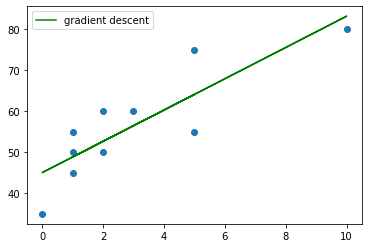

In [27]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

3* Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога эпсилон.

In [ ]:
n = X.shape[1]
eta = 1e-2 
n_iter = 500
W = np.array([1, 0.5])
W_old = W - 0.0001
epsilon = 0.001

print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

while W[0] - W_old[0] < epsilon and W[1] - W_old[1] < epsilon:
#for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    #print(W)
    W_old = W
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()